Objective of Project:
    1) Building a multiple classification model to see which model is having high accuracy 
    2) To predict if an arbitrary passenger on Titanic would survive the sinking or not.

Importing required libraries for this project.

In [272]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [273]:
df = pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


There are 891 rows and 12 columns in this given dataset and we can see categorical data in some columns and also NAN in some rows.

We will see how to handle this kinda data.

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see there are null values exist in some of the columns and will see how to handle missing values in later part.

In [275]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Dropping the CABIN column as the null values are more in number and dropping some other columns which is not useful for us to predict the survival rate.

In [276]:
df = df.drop(['Cabin','PassengerId','Ticket','Name'], axis =1)

In [277]:
df.head

<bound method NDFrame.head of      Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]>

As we dropped some columns,now our dataset has 8 coulumns where previously we have 12 columns.

We will split the categorical data and numerical data separately and we will check the further encoding and outlier detection/skewness if any.

In [278]:
cat_data = df.select_dtypes(include = np.object)

In [279]:
num_data = df.select_dtypes(exclude = np.object)

In [178]:
cat_data

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [179]:
num_data

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


Filling mode values to the NAN values for the columns "AGE" and "EMBARKED".

In [280]:
num_data['Age'] = num_data['Age'].fillna(num_data['Age'].mode()[0])
cat_data['Embarked'] = cat_data['Embarked'].fillna(cat_data['Embarked'].mode()[0])

In [281]:
num_data.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

Replacing Categorical data to Numeric data using Replace() function

In [282]:
cat_data['Sex']= cat_data['Sex'].replace({'male':0 , 'female':1})
cat_data['Embarked']= cat_data['Embarked'].replace({'S':0 , 'C':1, 'Q': 2})

In [283]:
cat_data.isnull().sum()

Sex         0
Embarked    0
dtype: int64

As we can see the data breifly here through describe() function,we can see that fare column has 0 minimum value which will not be exist and replacing 0 value to the mean data value.

In [284]:
num_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [285]:
num_data['Fare'] = num_data['Fare'].replace(0,num_data['Fare'].mean())

Done with Data Cleaning part and we will see how the data has been distributed via visualization by numeric and category data.

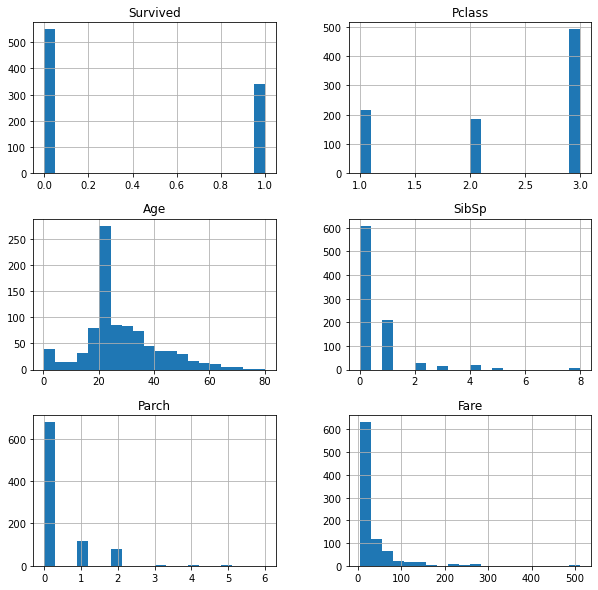

In [186]:
num_data.hist(bins = 20, figsize = (10,10))
plt.show()

We can see that data has been skewed postively in parch and fare column and age and sibsp column as well

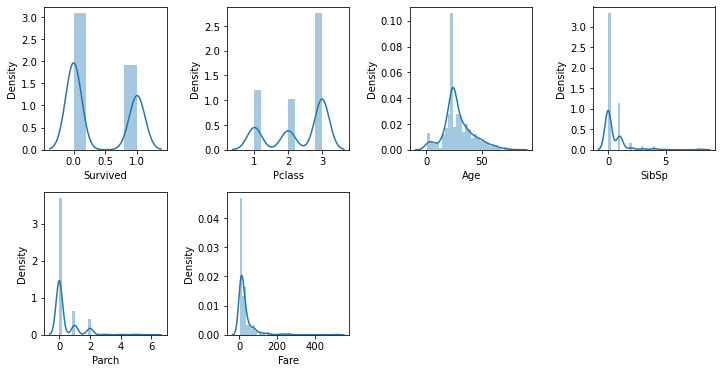

In [187]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in num_data:
    if pltnumber<=8:
        ax = plt.subplot(4,4,pltnumber)
        sns.distplot(num_data[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

Checking the outlier using Boxplot and we do have some outlier exist in the numeric data

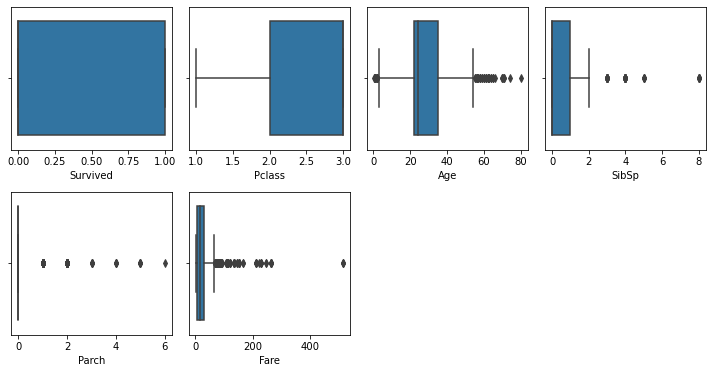

In [188]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in num_data:
    if pltnumber<=8:
        ax = plt.subplot(4,4,pltnumber)
        sns.boxplot(num_data[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

Applying outlier removal method - Z-Score Method to remove the outliers and % loss is 7%.

<10% outlier is applicable..so we will proceed further on this.

In [286]:
from scipy.stats import zscore

z = np.abs(zscore(num_data))
threshold = 3
df_new = num_data[(z<3).all(axis = 1)]

print("shape before and after")
print("shape before" .ljust(20),":",num_data.shape)
print("shape after" .ljust(20),":",df_new.shape)
print("% loss" .ljust(20),":",((num_data.shape[0]-df_new.shape[0])/num_data.shape[0])*100)

shape before and after
shape before         : (891, 6)
shape after          : (820, 6)
% loss               : 7.968574635241302


From the given plot below,we do see that skewness exist after removed the outlier.

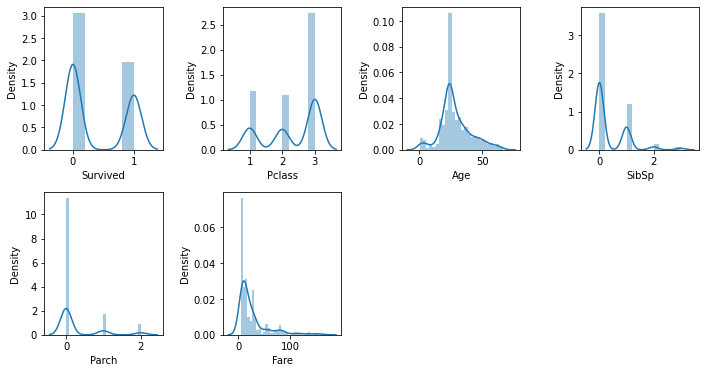

In [190]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df_new:
    if pltnumber<=8:
        ax = plt.subplot(4,4,pltnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

In [287]:
df_new.skew()

Survived    0.450825
Pclass     -0.632242
Age         0.564753
SibSp       1.979577
Parch       2.122629
Fare        2.318368
dtype: float64

To remove the Skewness, applying Power Transform method and checking skew using skew() method.


In [288]:
from sklearn.preprocessing import power_transform
df_new1 = power_transform(df_new, method ='yeo-johnson')

df_new1= pd.DataFrame(df_new1,columns=num_data.columns)

In [289]:
df_new1.skew()

Survived    0.450825
Pclass     -0.429718
Age         0.092760
SibSp       0.948944
Parch       1.581505
Fare        0.242198
dtype: float64

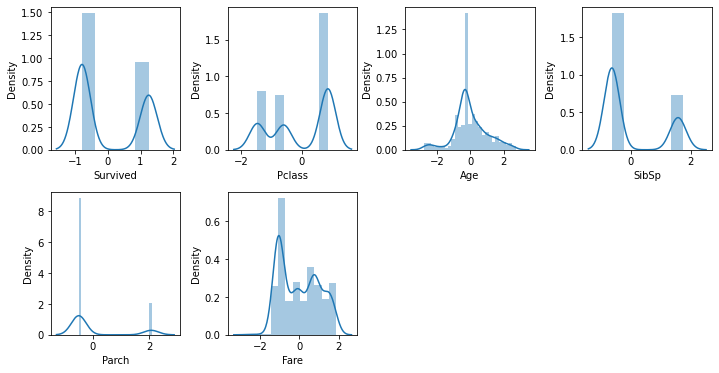

In [240]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df_new1:
    if pltnumber<=8:
        ax = plt.subplot(4,4,pltnumber)
        sns.distplot(df_new1[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

Viewing the Categorical data distribution and data looks normal

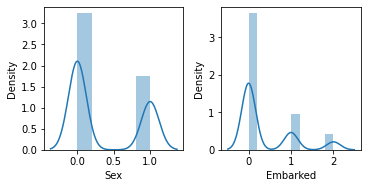

In [199]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in cat_data:
    if pltnumber<=8:
        ax = plt.subplot(4,4,pltnumber)
        sns.distplot(cat_data[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

We will see whether the target variable is balanced or imbalanced using countplot and data is somewhat balanced.
So proceeding with checking correlation between categorical data and numerical data.

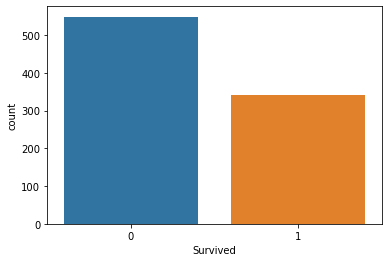

In [290]:
sns.countplot(df['Survived'])
plt.show()

In [291]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Using HeatMap we can see whether the features are correlated or not. As for the CATEGORICAL data, we do not see any correlation between variables.

In [292]:
corr = cat_data.corr()
corr

,Sex,Embarked
Sex,1.000000,0.116569
Embarked,0.116569,1.000000


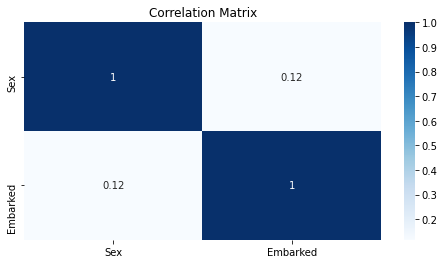

In [306]:
plt.figure(figsize= (8,4))
sns.heatmap(corr, cmap = 'Blues', annot = True)
plt.title("Correlation Matrix")
plt.show()

Same goes for Numeric data as well.there is no correlation between variables

In [294]:
corr1 = num_data.corr()
corr1

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.052872,-0.035322,0.081629,0.251092
Pclass,-0.338481,1.000000,-0.356187,0.083081,0.018443,-0.556409
Age,-0.052872,-0.356187,1.000000,-0.232411,-0.155118,0.108469
SibSp,-0.035322,0.083081,-0.232411,1.000000,0.414838,0.155030
Parch,0.081629,0.018443,-0.155118,0.414838,1.000000,0.211818
Fare,0.251092,-0.556409,0.108469,0.155030,0.211818,1.000000


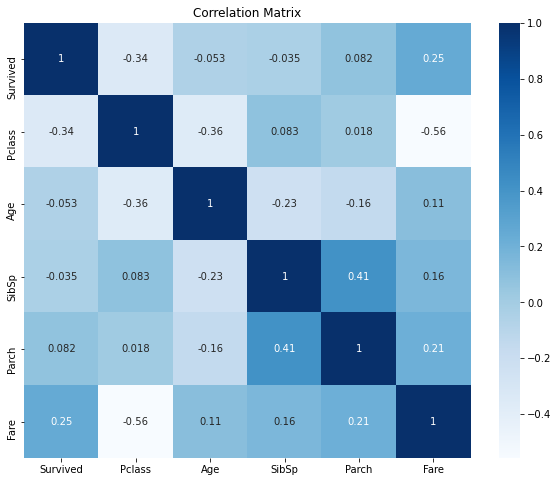

In [297]:
plt.figure(figsize= (10,8))
sns.heatmap(corr1, cmap = 'Blues', annot = True)
plt.title("Correlation Matrix")
plt.show()

Now it's time to scale and train and build the model.SO before proceeding further,We will merge the both categorical and numerical data into a single dataframe.

In [201]:
dff = pd.concat([num_data,cat_data], axis =1)
dff

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0,3,22.0,1,0,7.2500,0,0
1,1,1,38.0,1,0,71.2833,1,1
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0
887,1,1,19.0,0,0,30.0000,1,0
888,0,3,24.0,1,2,23.4500,1,0
889,1,1,26.0,0,0,30.0000,0,1


Correlation magtrix for the newly combined dataframe in cleaned data and we can see there is no correlation exist between variables.

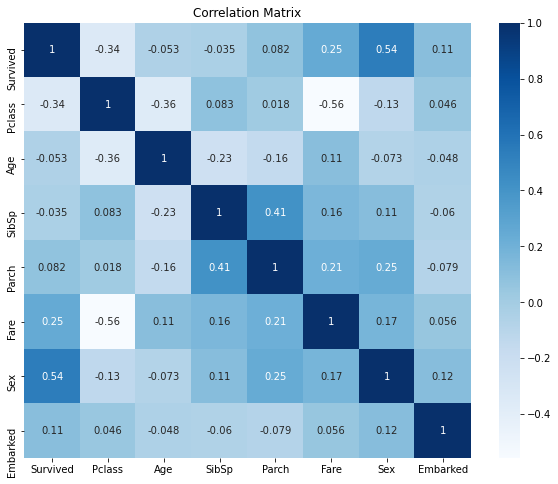

In [312]:
corr1 = dff.corr()

plt.figure(figsize= (10,8))
sns.heatmap(corr1, cmap = 'Blues', annot = True)
plt.title("Correlation Matrix")
plt.show()

Splitting X and Y variables,

In [205]:
x = dff.drop(columns = ['Survived'])
y = dff['Survived']

Scaling the data as there is a different range of data.So in order to equalize this range,we should scale the data and I used using Standard Scaler() method.

In [207]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(x)

Train and Test data Split

In [210]:
x_train,x_test,y_train,y_test = train_test_split(x_sc,y, test_size = 0.25, random_state = 315)

Model Building - We will try building on different algorthims and see which one fits well for this data using different technique later on this part.

I have choosen the below classification models for my data,
     1) support vector classifier 
     2) Decision tree classifier 
     3) Random forest Classifier 
     4) Ada boost classifier  
     5) Logistic Regression 

Model 1: Support Vector Classifier

In [211]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

Accuracy score 
 0.8475336322869955
Confusion Matrix 
 [[136  14]
 [ 20  53]]
Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       150
           1       0.79      0.73      0.76        73

    accuracy                           0.85       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.85      0.85      0.85       223

ROC AUC Score 
 0.8163470319634702


Model 2: Decision Tree Classifier

In [212]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

Accuracy score 
 0.7757847533632287
Confusion Matrix 
 [[116  34]
 [ 16  57]]
Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       150
           1       0.63      0.78      0.70        73

    accuracy                           0.78       223
   macro avg       0.75      0.78      0.76       223
weighted avg       0.80      0.78      0.78       223

ROC AUC Score 
 0.7770776255707762


Model 3: Random Forest Classifier

In [213]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

Accuracy score 
 0.8385650224215246
Confusion Matrix 
 [[128  22]
 [ 14  59]]
Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.85      0.88       150
           1       0.73      0.81      0.77        73

    accuracy                           0.84       223
   macro avg       0.81      0.83      0.82       223
weighted avg       0.84      0.84      0.84       223

ROC AUC Score 
 0.8307762557077626


Model 4: Ada Boost Classifier

In [214]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
y_pred = abc.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

Accuracy score 
 0.8071748878923767
Confusion Matrix 
 [[126  24]
 [ 19  54]]
Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       150
           1       0.69      0.74      0.72        73

    accuracy                           0.81       223
   macro avg       0.78      0.79      0.78       223
weighted avg       0.81      0.81      0.81       223

ROC AUC Score 
 0.78986301369863


Model 5: Logistic Regression

In [215]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

Accuracy score 
 0.7847533632286996
Confusion Matrix 
 [[121  29]
 [ 19  54]]
Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       150
           1       0.65      0.74      0.69        73

    accuracy                           0.78       223
   macro avg       0.76      0.77      0.76       223
weighted avg       0.79      0.78      0.79       223

ROC AUC Score 
 0.7731963470319634


ROC- Curve for all models

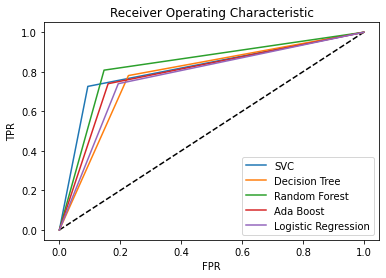

In [216]:
y_pred_prob1 = svm.predict(x_test)
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = dt.predict(x_test)
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)


y_pred_prob3 = rfc.predict(x_test)
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = abc.predict(x_test)
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)

y_pred_prob5 = lr.predict(x_test)
fpr5 , tpr5, thresholds5 = roc_curve(y_test, y_pred_prob5)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "SVC")
plt.plot(fpr2, tpr2, label= "Decision Tree")
plt.plot(fpr3, tpr3, label= "Random Forest")
plt.plot(fpr4, tpr4, label= "Ada Boost")
plt.plot(fpr5, tpr5, label= "Logistic Regression")
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('Receiver Operating Characteristic')
plt.show()

Support Vector model has high accuracy out of other models which has been built so far. Then, We will check whether model is overfitting or not using Cross Validation Score 

In [218]:
from sklearn.model_selection import cross_val_score

scr_svm = cross_val_score(svm,x_sc,y,cv=5)
print("CV Score of SVM :", scr_svm.mean())

CV Score of SVM : 0.8327663046889713


In [219]:
scr_dt = cross_val_score(dt,x_sc,y,cv=5)
print("CV Score of DT :", scr_dt.mean())

CV Score of DT : 0.7878915322327538


In [220]:
scr_rfc = cross_val_score(rfc,x_sc,y,cv=5)
print("CV Score of RFC :", scr_rfc.mean())

CV Score of RFC : 0.813709120582512


In [221]:
scr_abc = cross_val_score(abc,x_sc,y,cv=5)
print("CV Score of ABC :", scr_abc.mean())

CV Score of ABC : 0.8014123407193521


In [222]:
scr_lr = cross_val_score(lr,x_sc,y,cv=5)
print("CV Score of LR :", scr_lr.mean())

CV Score of LR : 0.7923670830456343


As per the CV score,Support Vector is having high score but if we compare accuracy and cv score and should look for the difference.The less difference is considered as a good model and that is Ada Boost Classifier.

We will try to improve the accuracy of Decision Tree model by hyperparameter tuning.

In [264]:
param = {'base_estimator' : [None] ,
         'n_estimators': [50,55,60,65,70,75,80,85,90,95,100], 
         'learning_rate':[1.0],
         'random_state' : [None],
         'algorithm': ['SAMME.R'],
         
          }

In [265]:
grid_search = GridSearchCV(abc,param_grid = param, cv=5)

In [266]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME.R'], 'base_estimator': [None],
                         'learning_rate': [1.0],
                         'n_estimators': [50, 55, 60, 65, 70, 75, 80, 85, 90,
                                          95, 100],
                         'random_state': [None]})

In [267]:
grid_search.best_params_

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 70,
 'random_state': None}

In [269]:
final = AdaBoostClassifier(algorithm = 'SAMME.R' ,base_estimator = None, learning_rate = 1.0,
                               n_estimators = 75 , random_state = None,)

final.fit(x_train,y_train)
pred = final.predict(x_test)

print("Accuracy- Score:-" , accuracy_score(y_test,pred))
print("Classification Report:DT-" , classification_report(y_test,pred))

Accuracy- Score:- 0.8251121076233184
Classification Report:DT-               precision    recall  f1-score   support

           0       0.88      0.85      0.87       150
           1       0.72      0.77      0.74        73

    accuracy                           0.83       223
   macro avg       0.80      0.81      0.80       223
weighted avg       0.83      0.83      0.83       223



As we can see that the model has improved the accuracy,before --> 80 and after tuning --> 83

Saving the model 

In [239]:
import joblib
joblib.dump(final,"titanic-prediction.pkl")

['titanic-prediction.pkl']